In [1]:
import polars as pl

In [2]:
testdf = pl.read_csv("../data/test.csv")
traindf = pl.read_csv("../data/train.csv")

In [3]:
testdf.head()

id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
i64,i64,str,i64,str,str,f64,i64,f64,i64,f64,f64,f64
165034,15773898,"""Lucchese""",586,"""France""","""Female""",23.0,2,0.0,2,0.0,1.0,160976.75
165035,15782418,"""Nott""",683,"""France""","""Female""",46.0,2,0.0,1,1.0,0.0,72549.27
165036,15807120,"""K?""",656,"""France""","""Female""",34.0,7,0.0,2,1.0,0.0,138882.09
165037,15808905,"""O'Donnell""",681,"""France""","""Male""",36.0,8,0.0,1,1.0,0.0,113931.57
165038,15607314,"""Higgins""",752,"""Germany""","""Male""",38.0,10,121263.62,1,1.0,0.0,139431.0


In [4]:
testdf.columns

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [5]:
traindf.columns

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:
traindf["Gender"].value_counts()

Gender,count
str,u32
"""Male""",93150
"""Female""",71884


In [7]:
traindf["Geography"].value_counts()

Geography,count
str,u32
"""France""",94215
"""Germany""",34606
"""Spain""",36213


In [8]:
# とりあえずnameは一旦切り捨てて、カテゴリカルはlabel encoding(ちなみにone-hot encodingでないのは、決定木アルゴリズムにおいて分岐が深くなって精度がカスになるから)
import numpy as np
without_name_train = traindf.drop("Surname")
without_name_train = without_name_train.with_columns(
    pl.col("Gender").replace({"Female": 1, "Male": 0}).cast(pl.Int32)
)
without_name_train = without_name_train.with_columns(
    pl.col("Geography").replace({"France": 0, "Germany": 1, "Spain": 2}).cast(pl.Int32)
)

without_name_test = testdf.drop("Surname")
without_name_test = without_name_test.with_columns(
    pl.col("Gender").replace({"Female": 1, "Male": 0}).cast(pl.Int32)
)
without_name_test = without_name_test.with_columns(
    pl.col("Geography").replace({"France": 0, "Germany": 1, "Spain": 2}).cast(pl.Int32)
)

In [9]:
without_name_train.head()

id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,i64,i32,i32,f64,i64,f64,i64,f64,f64,f64,i64
0,15674932,668,0,0,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,15749177,627,0,0,33.0,1,0.0,2,1.0,1.0,49503.5,0
2,15694510,678,0,0,40.0,10,0.0,2,1.0,0.0,184866.69,0
3,15741417,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,2,0,33.0,5,0.0,2,1.0,1.0,15068.83,0


In [10]:
without_name_test.head()

id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
i64,i64,i64,i32,i32,f64,i64,f64,i64,f64,f64,f64
165034,15773898,586,0,1,23.0,2,0.0,2,0.0,1.0,160976.75
165035,15782418,683,0,1,46.0,2,0.0,1,1.0,0.0,72549.27
165036,15807120,656,0,1,34.0,7,0.0,2,1.0,0.0,138882.09
165037,15808905,681,0,0,36.0,8,0.0,1,1.0,0.0,113931.57
165038,15607314,752,1,0,38.0,10,121263.62,1,1.0,0.0,139431.0


In [11]:
# とりあえずxgboost(カス)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(without_name_train.drop("Exited") , without_name_train["Exited"], test_size=.2)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)

In [12]:
#with roc-auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

np.float64(0.7293358728985792)

In [13]:
preds_first_submission = bst.predict(without_name_test)

In [14]:
preds_first_submission[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [15]:
pl.concat([without_name_test.select("id").rename({"id": "id"}), pl.DataFrame({"Exited": preds_first_submission})], how="horizontal").write_csv("../submission/first_submission.csv")

## カスなデータができたのでPoC

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

In [16]:
# CustomerIdに意味はあるのか?
traindf["CustomerId"].value_counts().sort(by="count")

CustomerId,count
i64,u32
15641779,1
15715236,1
15742967,1
15802785,1
15681768,1
…,…
15648067,90
15595588,91
15585835,98


In [17]:
traindf.filter(pl.col("CustomerId") == 15682355)

id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
i64,i64,str,i64,str,str,f64,i64,f64,i64,f64,f64,f64,i64
273,15682355,"""Hsueh""",727,"""Germany""","""Male""",35.0,9,140966.55,1,1.0,1.0,179227.21,0
2565,15682355,"""Tien""",744,"""France""","""Male""",37.0,6,0.0,2,1.0,1.0,137944.16,0
5063,15682355,"""Niu""",790,"""Spain""","""Male""",44.0,1,128100.75,1,1.0,0.0,164517.96,1
11942,15682355,"""Hsueh""",616,"""France""","""Female""",43.0,9,95167.82,2,0.0,1.0,132741.56,0
13009,15682355,"""Manna""",652,"""Spain""","""Female""",33.0,7,0.0,2,1.0,1.0,112333.22,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
159573,15682355,"""Onwuatuegwu""",679,"""France""","""Female""",39.0,6,0.0,2,1.0,0.0,123977.86,0
159690,15682355,"""Pinto""",629,"""Germany""","""Female""",34.0,2,140510.34,2,1.0,0.0,143681.75,0
159923,15682355,"""O'Donnell""",710,"""France""","""Female""",35.0,7,0.0,2,1.0,1.0,147055.87,0


In [18]:
traindf.filter(pl.col("CustomerId") == 15682355)["Exited"].value_counts()

Exited,count
i64,u32
1,33
0,88


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
traindf["Exited"].value_counts()

Exited,count
i64,u32
0,130113
1,34921


In [21]:
import pandas as pd

traindf = traindf.to_pandas()

In [ ]:
pd.crosstab(
    traindf["Exited"],
    traindf["IsActiveMember"],
    normalize='index'
)

IsActiveMember,0.0,1.0
Exited,,
0,0.447772,0.552228
1,0.705134,0.294866


In [27]:
pd.crosstab(
    traindf["Exited"],
    traindf["HasCrCard"],
    normalize='index'
)

HasCrCard,0.0,1.0
Exited,,
0,0.241106,0.758894
1,0.264454,0.735546


In [29]:
traindf["NumOfProducts"].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [30]:
pd.crosstab(
    traindf["Exited"],
    traindf["NumOfProducts"],
    normalize='index'
)

NumOfProducts,1,2,3,4
Exited,,,,
0,0.388247,0.608686,0.002613,0.000453
1,0.769107,0.145843,0.073137,0.011913


<Axes: xlabel='Balance', ylabel='Probability'>

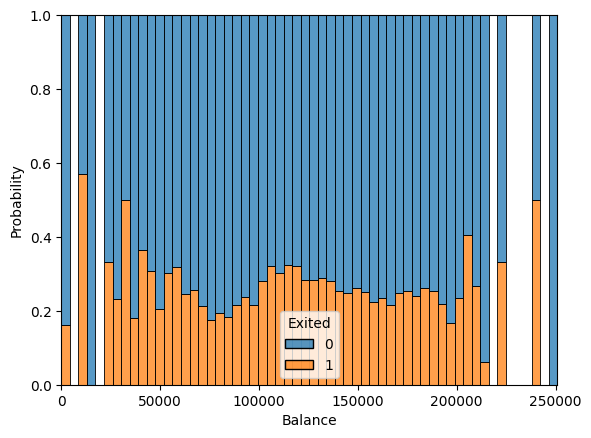

In [50]:
sns.histplot(x="Balance", hue="Exited", data=traindf, stat="probability", multiple="fill")

<Axes: xlabel='Tenure', ylabel='Probability'>

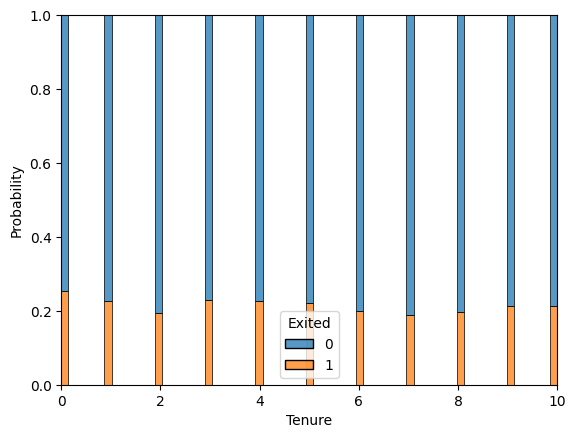

In [51]:
sns.histplot(x="Tenure", hue="Exited", data=traindf, stat="probability", multiple="fill")

Text(100, 0.5, '0.5')

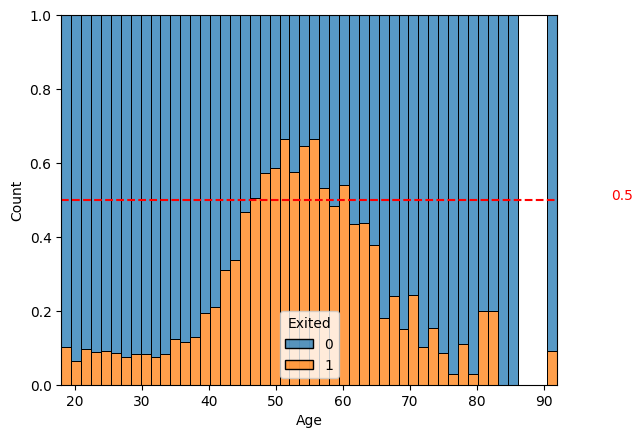

In [316]:
sns.histplot(x="Age", hue="Exited", multiple="fill",data=traindf,bins=50)
# 0.5 line y
plt.axhline(0.5, color='red', linestyle='--')
# print 0.5 line y
plt.text(100, 0.5, '0.5', color = 'red')

In [56]:
pd.crosstab(
    traindf["Exited"],
    traindf["Gender"],
    normalize='index'
)

Gender,Female,Male
Exited,,
0,0.397954,0.602046
1,0.575728,0.424272


In [57]:
pd.crosstab(
    traindf["Exited"],
    traindf["Geography"],
    normalize='index'
)

Geography,France,Germany,Spain
Exited,,,
0,0.604421,0.165179,0.230400
1,0.445921,0.375533,0.178546


<Axes: xlabel='CreditScore', ylabel='Count'>

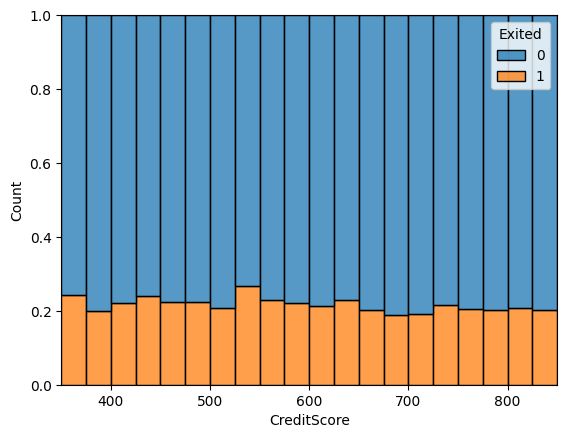

In [280]:
sns.histplot(x="CreditScore", hue="Exited", data=traindf, multiple="fill" ,bins=20)

In [72]:
# surname and exited cross table
pd.crosstab(
    traindf["Exited"],
    traindf["Surname"],
    normalize='index'
).sort_values(by=1, axis=1, ascending=False)

Surname,Hsia,Maclean,Hs?,T'ien,Ch'ang,Ch'iu,Martin,Genovese,H?,Hsueh,...,Bruny,McNess,Buckland,Flores,Sells,Selwyn,Semmens,Senior,Bryan,Abazu
Exited,,,,,,,,,,,,,,,,,,,,,
0,0.014925,0.009323,0.009592,0.014949,0.006894,0.006717,0.004289,0.004965,0.008631,0.007809,...,0.000008,0.000015,0.000015,0.000015,0.000031,0.000008,0.000015,0.000015,0.000023,0.000008
1,0.014719,0.010424,0.010395,0.009650,0.009507,0.009307,0.009078,0.009049,0.008505,0.008304,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
# surname without low frequency and exited cross table
pd.crosstab(
    traindf["Exited"],
    traindf["Surname"],
    normalize='index'
).sort_values(by=1, axis=1, ascending=False).loc[:, traindf["Surname"].value_counts() > 100]

Surname,Hsia,Maclean,Hs?,T'ien,Ch'ang,Ch'iu,Martin,Genovese,H?,Hsueh,...,Black,Hill,Biryukov,Mitchell,King,Onochie,Dickson,Padovesi,Dyer,Padovano
Exited,,,,,,,,,,,,,,,,,,,,,
0,0.014925,0.009323,0.009592,0.014949,0.006894,0.006717,0.004289,0.004965,0.008631,0.007809,...,0.001230,0.000746,0.001383,0.000822,0.000738,0.000769,0.001906,0.001145,0.001322,0.000930
1,0.014719,0.010424,0.010395,0.009650,0.009507,0.009307,0.009078,0.009049,0.008505,0.008304,...,0.000401,0.000372,0.000372,0.000372,0.000344,0.000286,0.000286,0.000258,0.000229,0.000229


In [94]:
# in surname, chinese people fillter
chinese_surnames = ["Hsia", "Hsueh", "Hsiung", "Kao", "T'ang"]
filtered_chinese_df = traindf[traindf["Surname"].str.startswith('c') | traindf["Surname"].str.contains("'") | traindf["Surname"].isin(chinese_surnames)]
other_surnames = traindf[~traindf["Surname"].str.startswith('c') & ~traindf["Surname"].str.contains("'") & ~traindf["Surname"].isin(chinese_surnames)]

In [96]:
other_surnames["Exited"].value_counts(normalize=True)

Exited
0    0.786472
1    0.213528
Name: proportion, dtype: float64

In [98]:
filtered_chinese_df["Exited"].value_counts(normalize=True)

Exited
0    0.800466
1    0.199534
Name: proportion, dtype: float64

In [99]:
!pip install ethnicolr2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.7 MB/s eta 0:00:007.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully unins

In [100]:
from ethnicolr2 import pred_fl_last_name, pred_fl_full_name

In [103]:
traindf["Surname"]

0         Okwudilichukwu
1          Okwudiliolisa
2                  Hsueh
3                    Kao
4              Chiemenam
               ...      
165029              Meng
165030         Okechukwu
165031              Hsia
165032            Hsiung
165033           Ulyanov
Name: Surname, Length: 165034, dtype: object

In [107]:
# とりあえずxgboost(カス)
X_train, X_test, y_train, y_test = train_test_split(without_name_train.drop(["Exited", "CreditScore"]) , without_name_train["Exited"], test_size=.2)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)

In [108]:
#with roc-auc
roc_auc_score(y_test, preds)

np.float64(0.7272859001060367)

In [109]:
X_train.head()

id,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
i64,i64,i32,i32,f64,i64,f64,i64,f64,f64,f64
123773,15568006,0,1,35.0,1,0.0,4,1.0,1.0,101039.53
59902,15617331,0,0,30.0,2,0.0,2,1.0,1.0,60774.39
44207,15626882,2,0,31.0,4,0.0,2,0.0,1.0,132861.83
110289,15800440,0,0,43.0,3,109844.81,1,1.0,0.0,72929.96
60154,15773520,0,0,42.0,7,0.0,2,1.0,0.0,84760.32


In [142]:
without_name_train_pd = without_name_train.to_pandas()
without_name_train_pd = pd.concat(
    [
        without_name_train_pd,
        without_name_train_pd["Age"].apply(lambda x: 1 if x > 40 else 0).rename("OverAge")
    ],
    axis=1
)

In [144]:
without_name_train_pd["OverAge"].value_counts()

OverAge
0    112783
1     52251
Name: count, dtype: int64

In [147]:
without_name_train_pd

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OverAge
0,0,15674932,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,1,15749177,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,2,15694510,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,3,15741417,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,667,2,1,33.0,2,0.00,1,1.0,1.0,131834.75,0,0
165030,165030,15665521,792,0,0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0
165031,165031,15664752,565,0,0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0
165032,165032,15689614,554,2,1,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(without_name_train_pd.drop(["Exited", "CreditScore"], axis=1) , without_name_train_pd["Exited"], test_size=.2)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)

In [181]:
#with roc-auc
roc_auc_score(y_test, preds)

np.float64(0.72680370067294)

In [182]:
# make IsZeroBalance
without_name_train_pd = pd.concat(
    [
        without_name_train_pd,
        without_name_train_pd["Balance"].apply(lambda x: 1 if x == 0 else 0).rename("IsZeroBalance")
    ],
    axis=1
)

In [183]:
without_name_train_pd

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OverAge,IsZeroBalance
0,0,15674932,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1
1,1,15749177,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1
2,2,15694510,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1
3,3,15741417,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0
4,4,15766172,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,667,2,1,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1
165030,165030,15665521,792,0,0,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,1
165031,165031,15664752,565,0,0,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,1
165032,165032,15689614,554,2,1,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0


In [184]:
X_train, X_test, y_train, y_test = train_test_split(without_name_train_pd.drop(["Exited", "CreditScore"], axis=1) , without_name_train_pd["Exited"], test_size=.2)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)

In [187]:
#with roc-auc
roc_auc_score(y_test, preds)

np.float64(0.7334545407480597)

<Axes: xlabel='CreditScore', ylabel='Balance'>

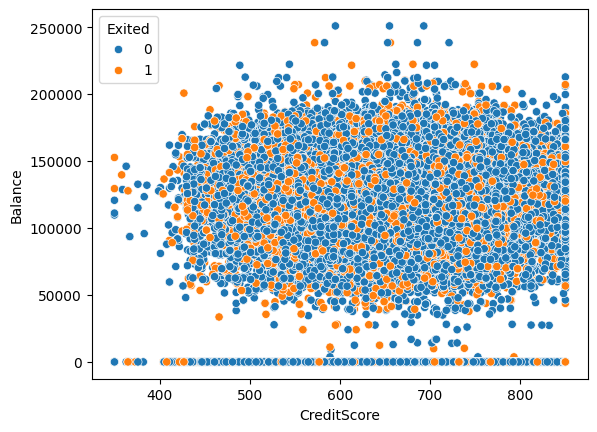

In [189]:
sns.scatterplot(y="Balance", x="CreditScore", hue="Exited", data=without_name_train_pd)

<Axes: xlabel='CreditScore', ylabel='Probability'>

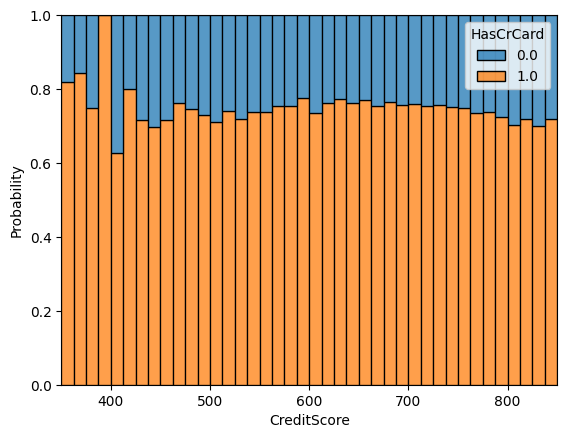

In [287]:
sns.histplot(x="CreditScore", hue="HasCrCard", data=without_name_train_pd, stat="probability", multiple="fill", bins=40)

<Axes: xlabel='EstimatedSalary', ylabel='Probability'>

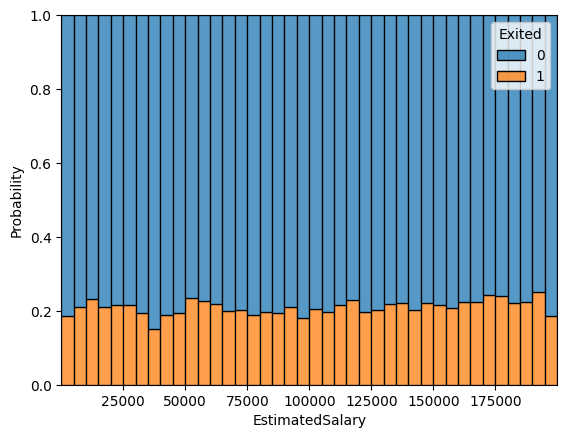

In [197]:
sns.histplot(x="EstimatedSalary", hue="Exited", data=without_name_train_pd, stat="probability", multiple="fill", bins=40)

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

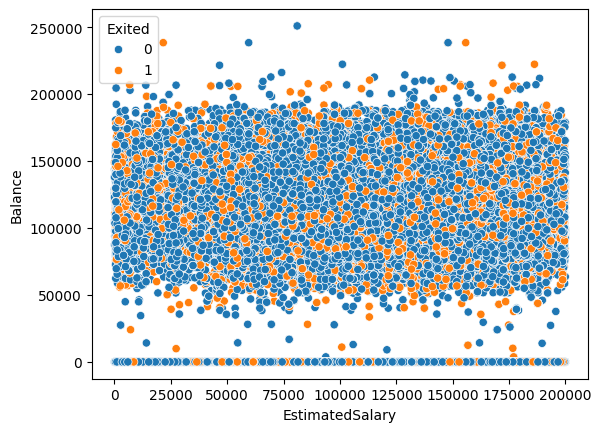

In [198]:
sns.scatterplot(y="Balance", x="EstimatedSalary", hue="Exited", data=without_name_train_pd)

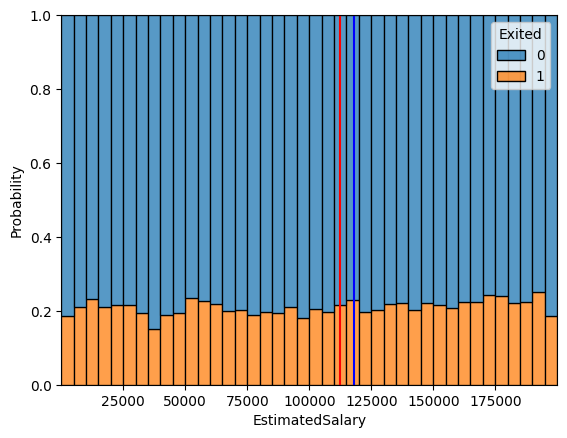

In [205]:
sns.histplot(x="EstimatedSalary", data=without_name_train_pd, hue="Exited", stat="probability", multiple="fill", bins=40)
# write to graph on average salary and mean salary line
plt.axvline(without_name_train_pd["EstimatedSalary"].mean(), color='red')
plt.axvline(without_name_train_pd["EstimatedSalary"].median(), color='blue')

<Axes: xlabel='Age', ylabel='Probability'>

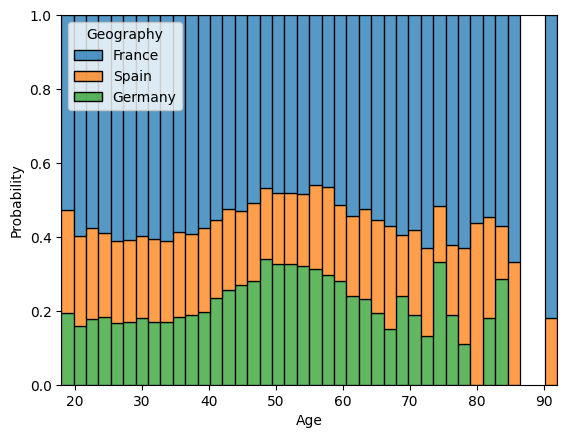

In [ ]:
sns.histplot(x="Age", hue="Geography", data=traindf, stat="probability", multiple="fill", bins=40)

<Axes: xlabel='Age', ylabel='Count'>

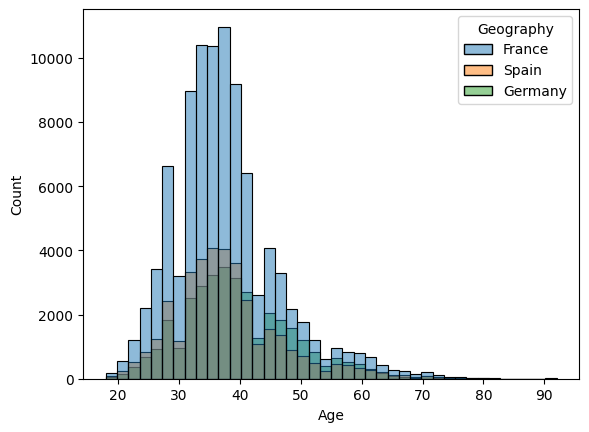

In [278]:
sns.histplot(x="Age", hue="Geography", data=traindf, bins=40)

In [247]:
CustomerIdHandler = (traindf.groupby("CustomerId").agg({"Exited": "mean"}) / traindf.groupby("CustomerId").agg({"Exited": "count"})).sort_values(by="Exited", ascending=False)

<Axes: ylabel='Count'>

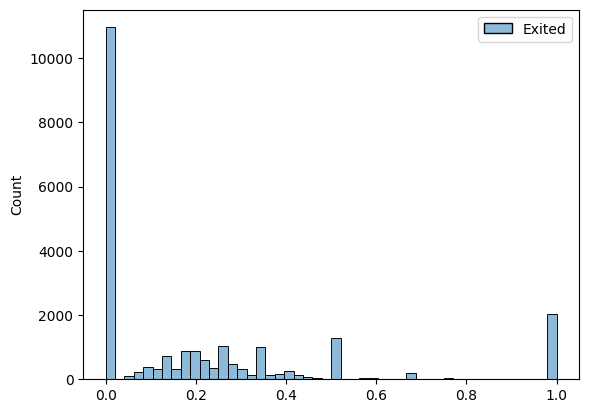

In [275]:
sns.histplot(traindf.groupby("CustomerId").agg({"Exited": "mean"}))

In [270]:
traindf.groupby("CustomerId").agg({"Exited": "count"}).sort_values(by="Exited", ascending=False)

,Exited
CustomerId,
15682355,121
15570194,99
15585835,98
15595588,91
15648067,90
...,...
15641625,1
15641624,1
15641621,1


<Axes: xlabel='Exited', ylabel='Count'>

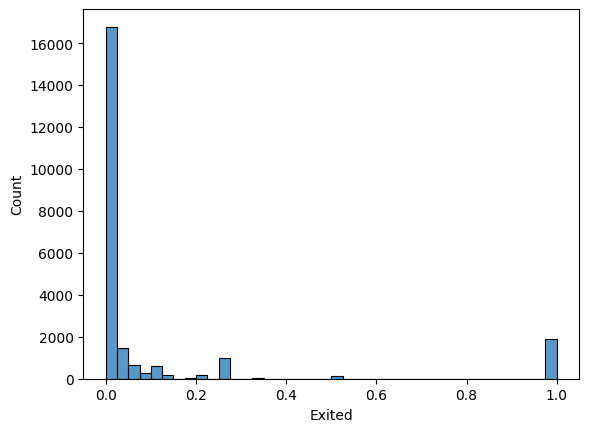

In [248]:
sns.histplot(x="Exited", data=CustomerIdHandler, bins=40)

In [249]:
HigherExitedCustomerIds = CustomerIdHandler[CustomerIdHandler["Exited"] > 0.5]

In [250]:
HigherExitedCustomerIds["CustomerId"] = HigherExitedCustomerIds.index

/var/folders/82/8xsldtz15svb1wk9664k1sg40000gn/T/ipykernel_21457/309293135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HigherExitedCustomerIds["CustomerId"] = HigherExitedCustomerIds.index


In [251]:
HigherExitedCustomer = traindf[traindf["CustomerId"].isin(HigherExitedCustomerIds["CustomerId"])]

In [252]:
HigherExitedCustomer.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1913.000000,1.913000e+03,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.0
mean,83057.597491,1.569223e+07,653.761631,44.512807,4.954522,74465.188970,1.348144,0.732358,0.309462,117267.657726,1.0
std,47343.917138,7.234532e+04,79.617001,9.013354,2.803450,62144.374143,0.682314,0.442846,0.462393,46936.062806,0.0
min,71.000000,1.556576e+07,373.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,468.940000,1.0
25%,41479.000000,1.563252e+07,595.000000,39.000000,3.000000,0.000000,1.000000,0.000000,0.000000,82709.800000,1.0
50%,82812.000000,1.569006e+07,652.000000,44.000000,5.000000,103060.630000,1.000000,1.000000,0.000000,122925.090000,1.0
75%,124645.000000,1.575789e+07,708.000000,51.000000,7.000000,125927.450000,1.000000,1.000000,1.000000,157937.350000,1.0
max,165012.000000,1.581564e+07,850.000000,73.000000,10.000000,207034.960000,4.000000,1.000000,1.000000,199862.380000,1.0


In [253]:
without_name_train_pd.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OverAge,IsZeroBalance
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,0.648545,0.435571,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599,0.316607,0.543209
std,47641.3565,7.139782e+04,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443,0.465154,0.498131
min,0.0000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,41258.2500,1.563314e+07,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000,0.000000,0.000000
50%,82516.5000,1.569017e+07,659.000000,0.000000,0.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000,0.000000,1.000000
75%,123774.7500,1.575682e+07,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000,1.000000,1.000000
max,165033.0000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000


<Axes: xlabel='CustomerId', ylabel='Count'>

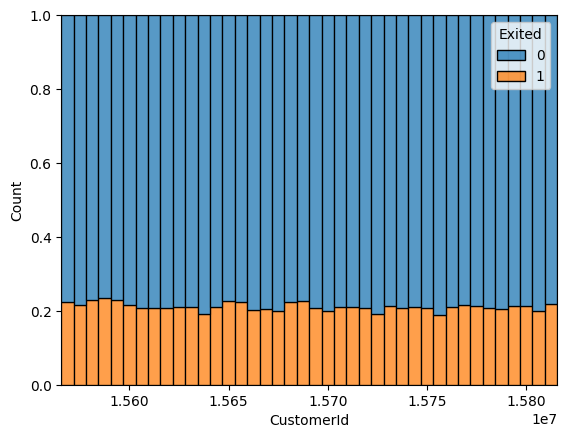

In [279]:
sns.histplot(x="CustomerId", hue="Exited",data=without_name_train_pd, multiple="fill", bins=40)

<Axes: xlabel='CustomerId', ylabel='Count'>

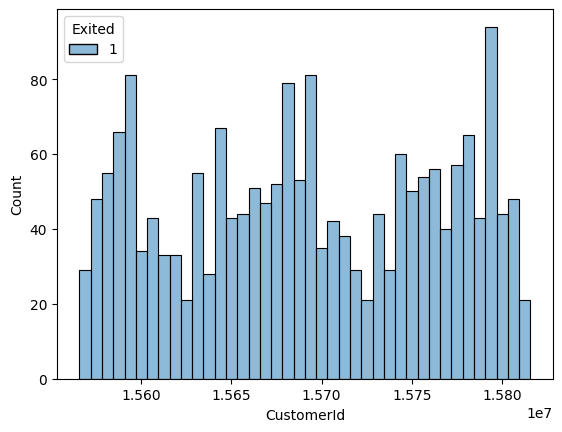

In [255]:
sns.histplot(x="CustomerId", hue="Exited",data=HigherExitedCustomer, bins=40)

In [258]:
traindf.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
HigherExitedCustomer.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
71,71,15796849,Hsiung,682,Germany,Female,34.0,5,126731.71,1,1.0,0.0,153870.58,1
152,152,15602344,Ch'ang,479,Germany,Female,58.0,2,131644.00,1,1.0,1.0,152733.89,1
237,237,15621072,Y?,724,France,Female,62.0,4,0.00,1,1.0,1.0,179913.54,1
515,515,15693731,Chiawuotu,718,France,Female,29.0,9,125385.49,1,0.0,0.0,92916.54,1
768,768,15585300,Chien,636,Germany,Female,47.0,7,118448.15,1,0.0,0.0,53667.08,1


In [261]:
HigherExitedCustomer["Surname"].value_counts()

Surname
Genovese    30
Hs?         25
Kao         25
Ch'ang      24
Hsia        24
            ..
Cremin       1
Horsfall     1
Krawczyk     1
Walton       1
Naylor       1
Name: count, Length: 498, dtype: int64

In [264]:
HigherExitedCustomer[HigherExitedCustomer["Surname"] == "Genovese"]["CustomerId"].value_counts()

CustomerId
15757478    1
15583481    1
15786629    1
15729991    1
15600809    1
15691515    1
15652915    1
15603739    1
15610106    1
15674431    1
15768150    1
15793345    1
15751149    1
15683967    1
15662979    1
15787826    1
15621867    1
15607579    1
15721587    1
15703917    1
15703731    1
15667265    1
15744657    1
15757607    1
15596913    1
15665585    1
15762597    1
15715029    1
15748028    1
15586487    1
Name: count, dtype: int64

<Axes: xlabel='CustomerId', ylabel='Count'>

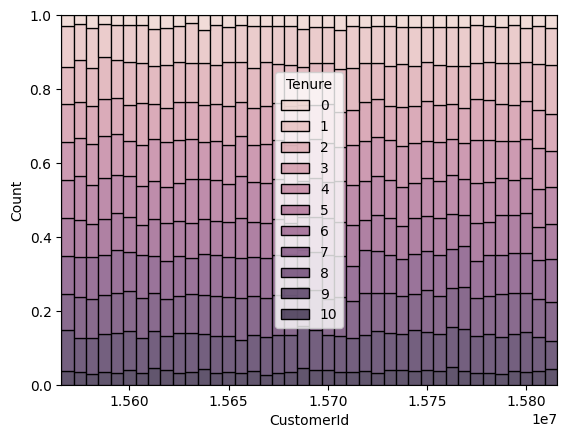

In [281]:
sns.histplot(x="CustomerId", hue="Tenure",data=traindf, multiple="fill", bins=40)

<Axes: xlabel='id', ylabel='Count'>

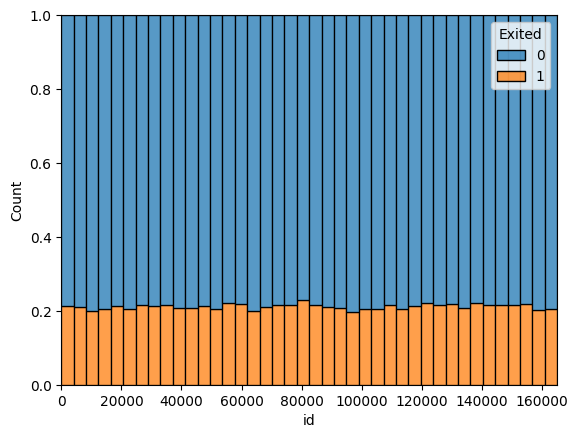

In [282]:
sns.histplot(x="id", hue="Exited",data=traindf, multiple="fill", bins=40)

<Axes: xlabel='id', ylabel='Count'>

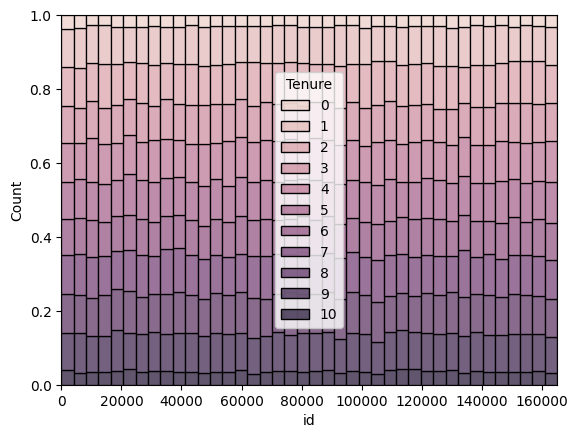

In [284]:
sns.histplot(x="id", hue="Tenure",data=traindf, multiple="fill", bins=40)

In [272]:
traindf[traindf["CustomerId"] == 15682355].describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,80693.479339,15682355.0,680.975207,39.570248,4.909091,59258.358595,1.578512,0.867769,0.471074,106840.149421,0.272727
std,48567.251832,0.0,70.459972,8.276298,2.783882,59958.100826,0.573760,0.340151,0.501238,44298.840482,0.447214
min,273.000000,15682355.0,445.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,30934.000000,15682355.0,635.000000,34.000000,3.000000,0.000000,1.000000,1.000000,0.000000,81492.830000,0.000000
50%,78169.000000,15682355.0,686.000000,38.000000,4.000000,75075.140000,2.000000,1.000000,0.000000,92985.780000,0.000000
75%,116876.000000,15682355.0,727.000000,43.000000,7.000000,118317.270000,2.000000,1.000000,1.000000,140168.360000,1.000000
max,164134.000000,15682355.0,813.000000,64.000000,10.000000,156822.280000,4.000000,1.000000,1.000000,187919.270000,1.000000


<Axes: xlabel='CreditScore', ylabel='Count'>

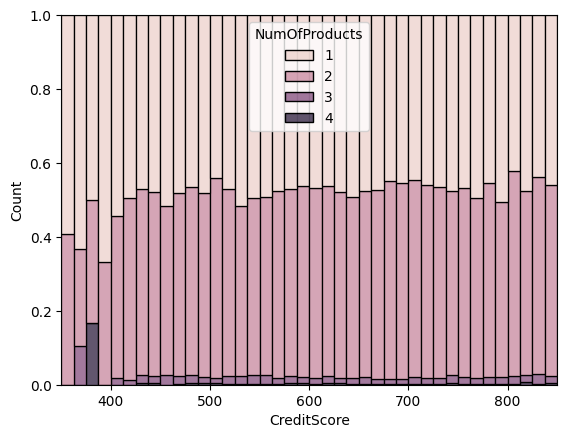

In [292]:
sns.histplot(x="CreditScore", hue="NumOfProducts",data=traindf, multiple="fill", bins=40)

In [276]:
traindf.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [289]:
traindf[traindf["Exited"] == 1].describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,34921.000000,3.492100e+04,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.000000,34921.0
mean,82747.524384,1.569063e+07,652.220469,43.958478,4.914378,71209.978085,1.327854,0.735546,0.294866,114402.496656,1.0
std,47538.333677,7.186487e+04,81.136331,9.004380,2.826564,62646.691947,0.661912,0.441048,0.455989,50542.030878,0.0
min,5.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,41656.000000,1.563151e+07,593.000000,38.000000,3.000000,0.000000,1.000000,0.000000,0.000000,74965.440000,1.0
50%,82515.000000,1.568776e+07,651.000000,44.000000,5.000000,98955.870000,1.000000,1.000000,0.000000,120892.960000,1.0
75%,124032.000000,1.575606e+07,708.000000,50.000000,7.000000,125437.140000,1.000000,1.000000,1.000000,158750.530000,1.0
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.0


In [290]:
traindf[traindf["Exited"] == 0].describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,130113.000000,1.301130e+05,130113.000000,130113.000000,130113.000000,130113.000000,130113.000000,130113.000000,130113.000000,130113.000000,130113.0
mean,82454.495416,1.569237e+07,657.590710,36.560480,5.048796,51255.807752,1.615273,0.758894,0.552228,112084.293725,0.0
std,47668.960691,7.126773e+04,79.785902,8.147944,2.799985,62189.978970,0.494632,0.427756,0.497267,50214.655044,0.0
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.0
25%,41168.000000,1.563385e+07,599.000000,31.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74425.410000,0.0
50%,82519.000000,1.569067e+07,662.000000,36.000000,5.000000,0.000000,2.000000,1.000000,1.000000,116977.890000,0.0
75%,123697.000000,1.575688e+07,711.000000,40.000000,7.000000,116858.660000,2.000000,1.000000,1.000000,153727.320000,0.0
max,165032.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,0.0


In [293]:
traindf.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# ここからわかること

- CustomerIdは重複している時があるが、これは合成データ由来の特徴のように見受けられる。また、CustomerIdの大きさが時期と一致しているようにも見えない(Tenureとの関連性が全くもってないため)
- idにおいても関連性はない
- CreditScore単体でExitedに影響を与えているようには見えない。ただし、CreditScoreはHasCrCard等に影響を与えている
- Age←影響を与えている。とりわけ50,60代の解約率が高い。
- IsActiveMemberは影響を与えている。
- NameOfProductsは微妙
- Tenure おそらく関係がない。
- Balanceは明らかに影響を与えている

# ここからやること

- CustomerId, Surname, CreditScore,Tenure,NameofProducts, idを軒並み落とす

In [304]:
traindf.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [351]:
droped_train = traindf.drop(columns=[
    "id",
    "CustomerId",
    "Surname",
], axis=1)

droped_train.replace({"Geography": {"France": 0, "Germany": 1, "Spain": 2}}, inplace=True)
droped_train.replace({"Gender": {"Male": 0, "Female": 1}}, inplace=True)

droped_train["IsZeroBalance"] = droped_train["Balance"].apply(lambda x: 1 if x == 0 else 0)
droped_train["MiddleAge"] = droped_train["Age"].apply(lambda x: 1 if 45 <= x <= 65 else 0)

/var/folders/82/8xsldtz15svb1wk9664k1sg40000gn/T/ipykernel_21457/2663779122.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  droped_train.replace({"Geography": {"France": 0, "Germany": 1, "Spain": 2}}, inplace=True)
/var/folders/82/8xsldtz15svb1wk9664k1sg40000gn/T/ipykernel_21457/2663779122.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  droped_train.replace({"Gender": {"Male": 0, "Female": 1}}, inplace=True)


In [352]:
droped_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsZeroBalance,MiddleAge
0,668,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0
1,627,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0
2,678,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0
3,581,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0
4,716,2,0,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,1,33.0,2,0.00,1,1.0,1.0,131834.75,0,1,0
165030,792,0,0,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0
165031,565,0,0,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0
165032,554,2,1,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0


In [353]:
# K-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X = droped_train.drop("Exited", axis=1)
y = droped_train["Exited"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
roc_aucs = []

#Xgboost
from xgboost import XGBClassifier

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    bst = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, objective='binary:logistic')
    bst.fit(X_train, y_train)
    preds = bst.predict(X_test)
    roc_aucs.append(roc_auc_score(y_test, preds))

roc_aucs

[np.float64(0.7318959494770663),
 np.float64(0.7366926275984866),
 np.float64(0.7297571215198256),
 np.float64(0.7322238624473196),
 np.float64(0.7326026305787781)]

In [1]:
def objective(trial):
    # ハイパーパラメータの探索範囲を拡張
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    gamma = trial.suggest_float("gamma", 0, 5)

    # モデル定義
    bst = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        gamma=gamma,
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric="logloss"
    )

    # 交差検証
    roc_aucs = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        bst.fit(X_train, y_train)
        preds = bst.predict_proba(X_test)[:, 1]  # 確率値を使用
        roc_aucs.append(roc_auc_score(y_test, preds))

    return np.mean(roc_aucs)

# Optunaで最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# 最適なパラメータを出力
print("Best trial:")
print(study.best_trial.params)


NameError: name 'optuna' is not defined

In [356]:
study.best_params

{'learning_rate': 0.042510779408126184,
 'n_estimators': 504,
 'max_depth': 6,
 'subsample': 0.7702037235441209,
 'colsample_bytree': 0.5820184072046024,
 'min_child_weight': 6,
 'gamma': 2.4555202781920555}

In [357]:
study.best_value

0.8897748538795162

In [ ]:
# submission

droped_test = testdf.to_pandas().drop(columns=[
    "id",
    "CustomerId",
    "Surname",
], axis=1)

droped_test.replace({"Geography": {"France": 0, "Germany": 1, "Spain": 2}}, inplace=True)
droped_test.replace({"Gender": {"Male": 0, "Female": 1}}, inplace=True)

droped_test["IsZeroBalance"] = droped_test["Balance"].apply(lambda x: 1 if x == 0 else 0)
droped_test["MiddleAge"] = droped_test["Age"].apply(lambda x: 1 if 45 <= x <= 65 else 0)


/var/folders/82/8xsldtz15svb1wk9664k1sg40000gn/T/ipykernel_21457/1899394994.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  droped_test.replace({"Geography": {"France": 0, "Germany": 1, "Spain": 2}}, inplace=True)
/var/folders/82/8xsldtz15svb1wk9664k1sg40000gn/T/ipykernel_21457/1899394994.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  droped_test.replace({"Gender": {"Male": 0, "Female": 1}}, inplace=True)


In [359]:
droped_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,IsZeroBalance,MiddleAge
0,586,0,1,23.0,2,0.00,2,0.0,1.0,160976.75,1,0
1,683,0,1,46.0,2,0.00,1,1.0,0.0,72549.27,1,1
2,656,0,1,34.0,7,0.00,2,1.0,0.0,138882.09,1,0
3,681,0,0,36.0,8,0.00,1,1.0,0.0,113931.57,1,0
4,752,1,0,38.0,10,121263.62,1,1.0,0.0,139431.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,2,0,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0
110019,575,0,1,36.0,4,178032.53,1,1.0,1.0,42181.68,0,0
110020,712,0,0,31.0,2,0.00,2,1.0,0.0,16287.38,1,0
110021,709,0,1,32.0,3,0.00,1,1.0,1.0,158816.58,1,0


In [364]:
params

{'learning_rate': 0.042510779408126184,
 'n_estimators': 504,
 'max_depth': 6,
 'subsample': 0.7702037235441209,
 'colsample_bytree': 0.5820184072046024,
 'min_child_weight': 6,
 'gamma': 2.4555202781920555}

In [369]:
params = {'learning_rate': 0.07324766656386618, 'n_estimators': 494, 'max_depth': 2, 'subsample': 0.6587160059268222, 'colsample_bytree': 0.6146857979505783, 'min_child_weight': 9, 'gamma': 2.4299971152094137}

In [370]:
# submission modeling
bst = XGBClassifier(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        learning_rate=params["learning_rate"],
        subsample=params["subsample"],
        colsample_bytree=params["colsample_bytree"],
        min_child_weight=params["min_child_weight"],
        gamma=params["gamma"],
        objective='binary:logistic',
        eval_metric="logloss"
    )
# KFold cross validation on droped_train
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X = droped_train.drop("Exited", axis=1)
y = droped_train["Exited"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
roc_aucs = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    bst.fit(X_train, y_train)
    preds = bst.predict(X_test)
    roc_aucs.append(roc_auc_score(y_test, preds))

roc_aucs


[np.float64(0.743262821649665),
 np.float64(0.7462520681216048),
 np.float64(0.7411674337649763),
 np.float64(0.7443501938533701),
 np.float64(0.7428502871347823)]

In [371]:
preds = bst.predict(droped_test)

In [372]:
preds

array([0, 1, 0, ..., 0, 0, 0], shape=(110023,))

In [373]:
pl.concat([testdf.select("id").rename({"id": "id"}), pl.DataFrame({"Exited": preds})], how="horizontal").write_csv("../submission/third.csv")